In [249]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error


In [3]:
df=pd.read_csv('Housing.csv')
df.head() 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [19]:
df.isnull().sum() 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Apply the LabelEncoder to each categorical column
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    df[column] = label_encoder.fit_transform(df[column])

In [23]:
df.head() 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [25]:
df.tail() 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,2


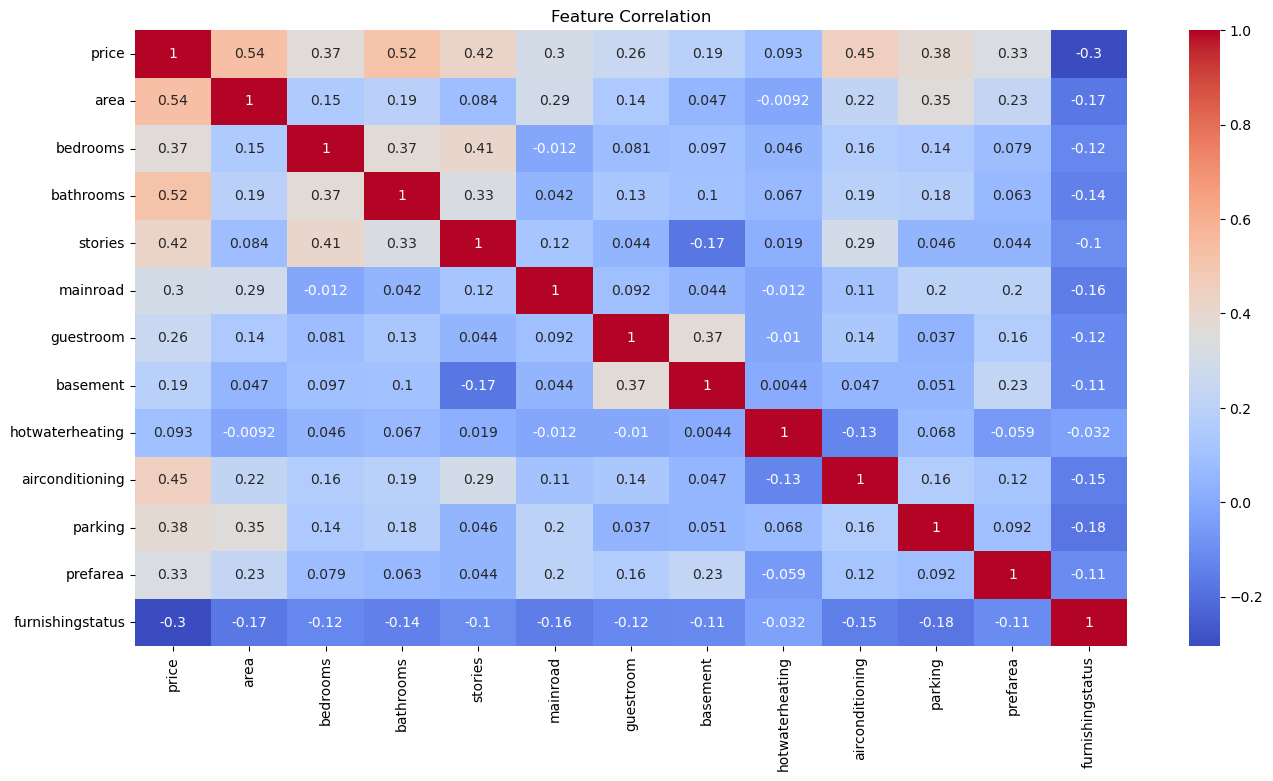

In [35]:
# Increase the size of the heatmap
plt.figure(figsize=(16, 8))  # Adjust the figsize to your liking
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

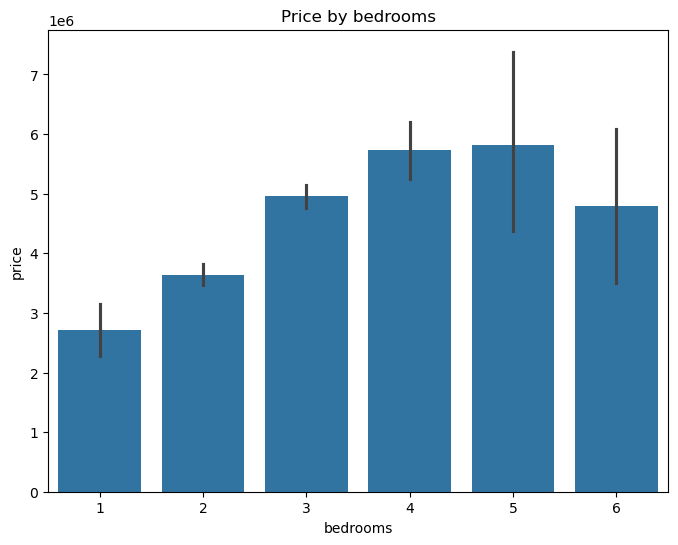

In [84]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(data=df, x='bedrooms', y='price')
plt.title(f'Price by bedrooms')
plt.show()

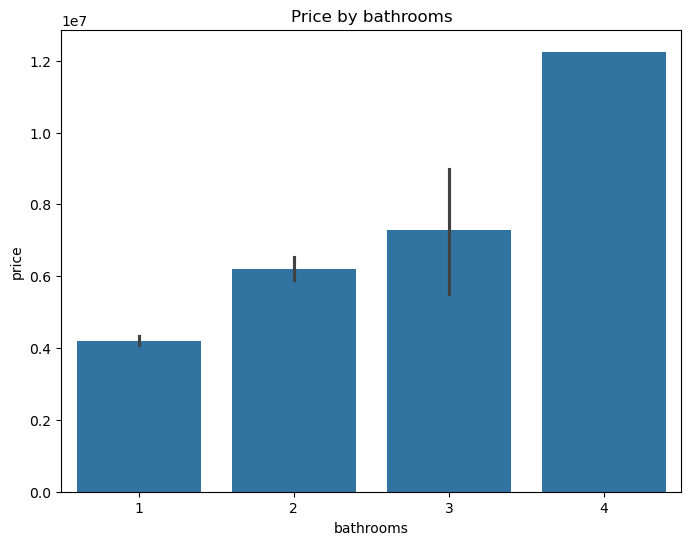

In [80]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(data=df, x='bathrooms', y='price')
plt.title(f'Price by bathrooms')
plt.show()

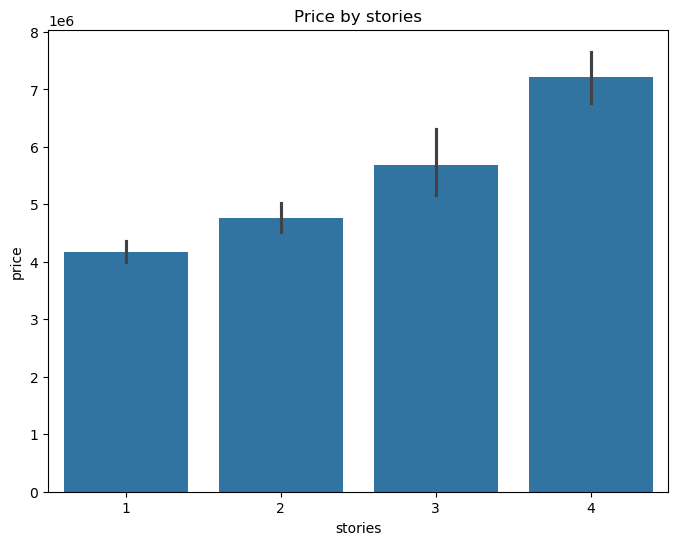

In [82]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(data=df, x='stories', y='price')
plt.title(f'Price by stories')
plt.show()

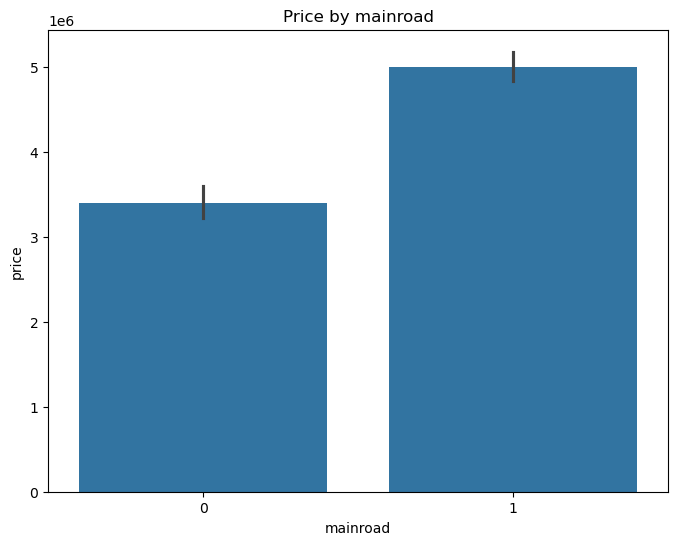

In [87]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(data=df, x='mainroad', y='price')
plt.title(f'Price by mainroad')
plt.show()

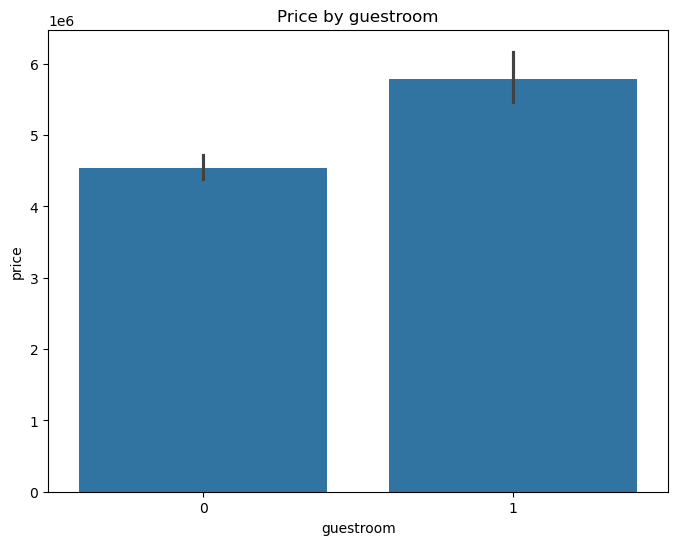

In [89]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(data=df, x='guestroom', y='price')
plt.title(f'Price by guestroom')
plt.show()

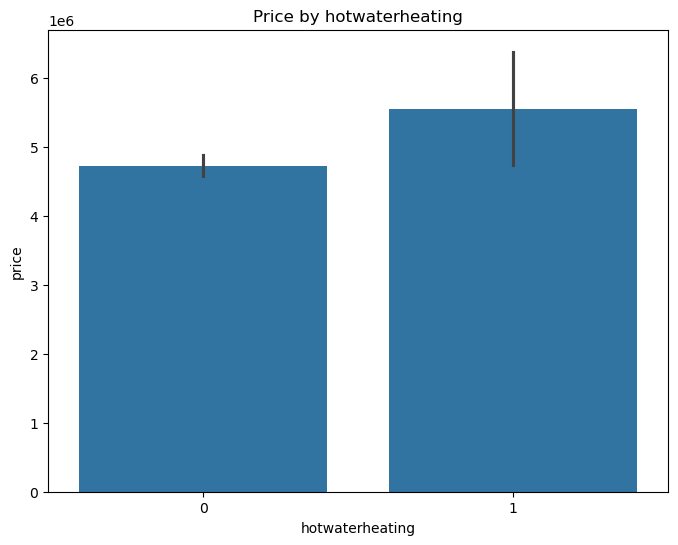

In [91]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(data=df, x='hotwaterheating', y='price')
plt.title(f'Price by hotwaterheating')
plt.show()

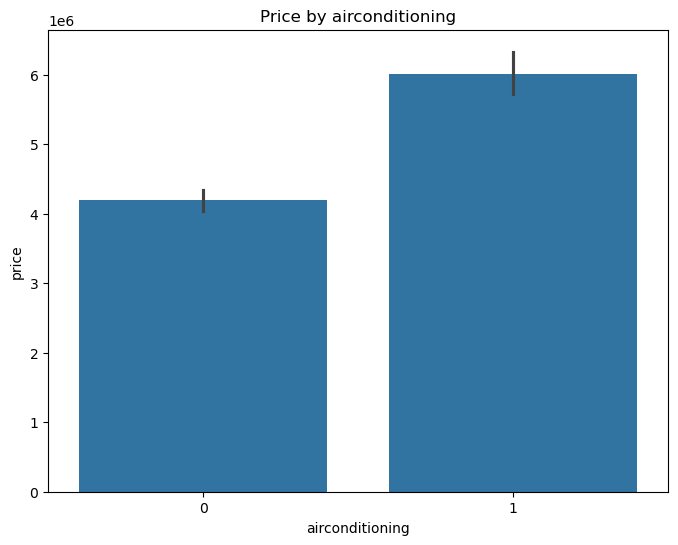

In [93]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(data=df, x='airconditioning', y='price')
plt.title(f'Price by airconditioning')
plt.show()

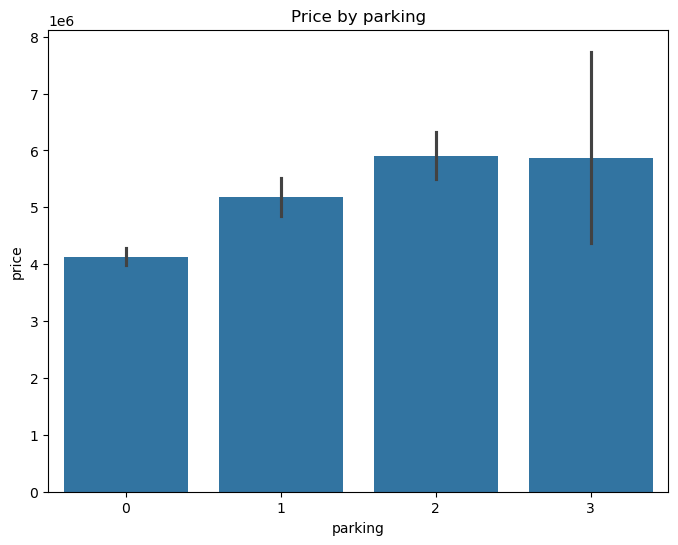

In [95]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(data=df, x='parking', y='price')
plt.title(f'Price by parking')
plt.show()

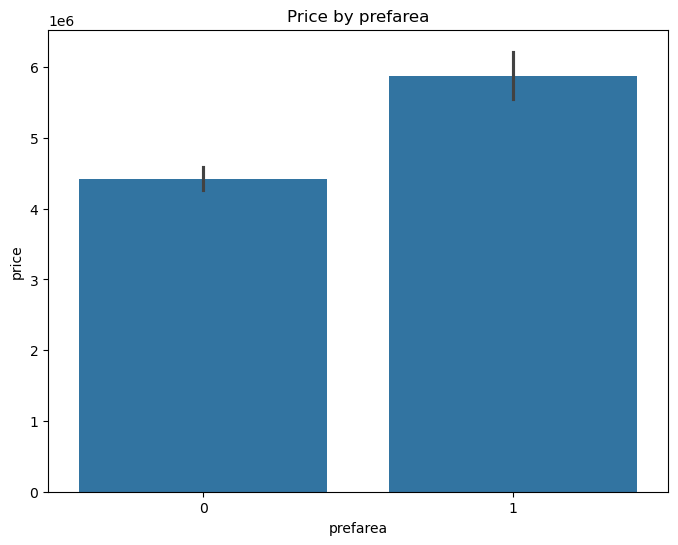

In [97]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(data=df, x='prefarea', y='price')
plt.title(f'Price by prefarea')
plt.show()

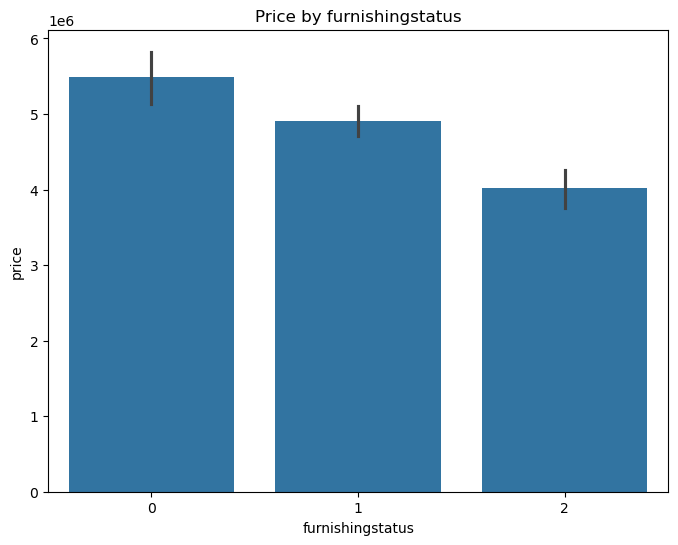

In [99]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.barplot(data=df, x='furnishingstatus', y='price')
plt.title(f'Price by furnishingstatus')
plt.show()

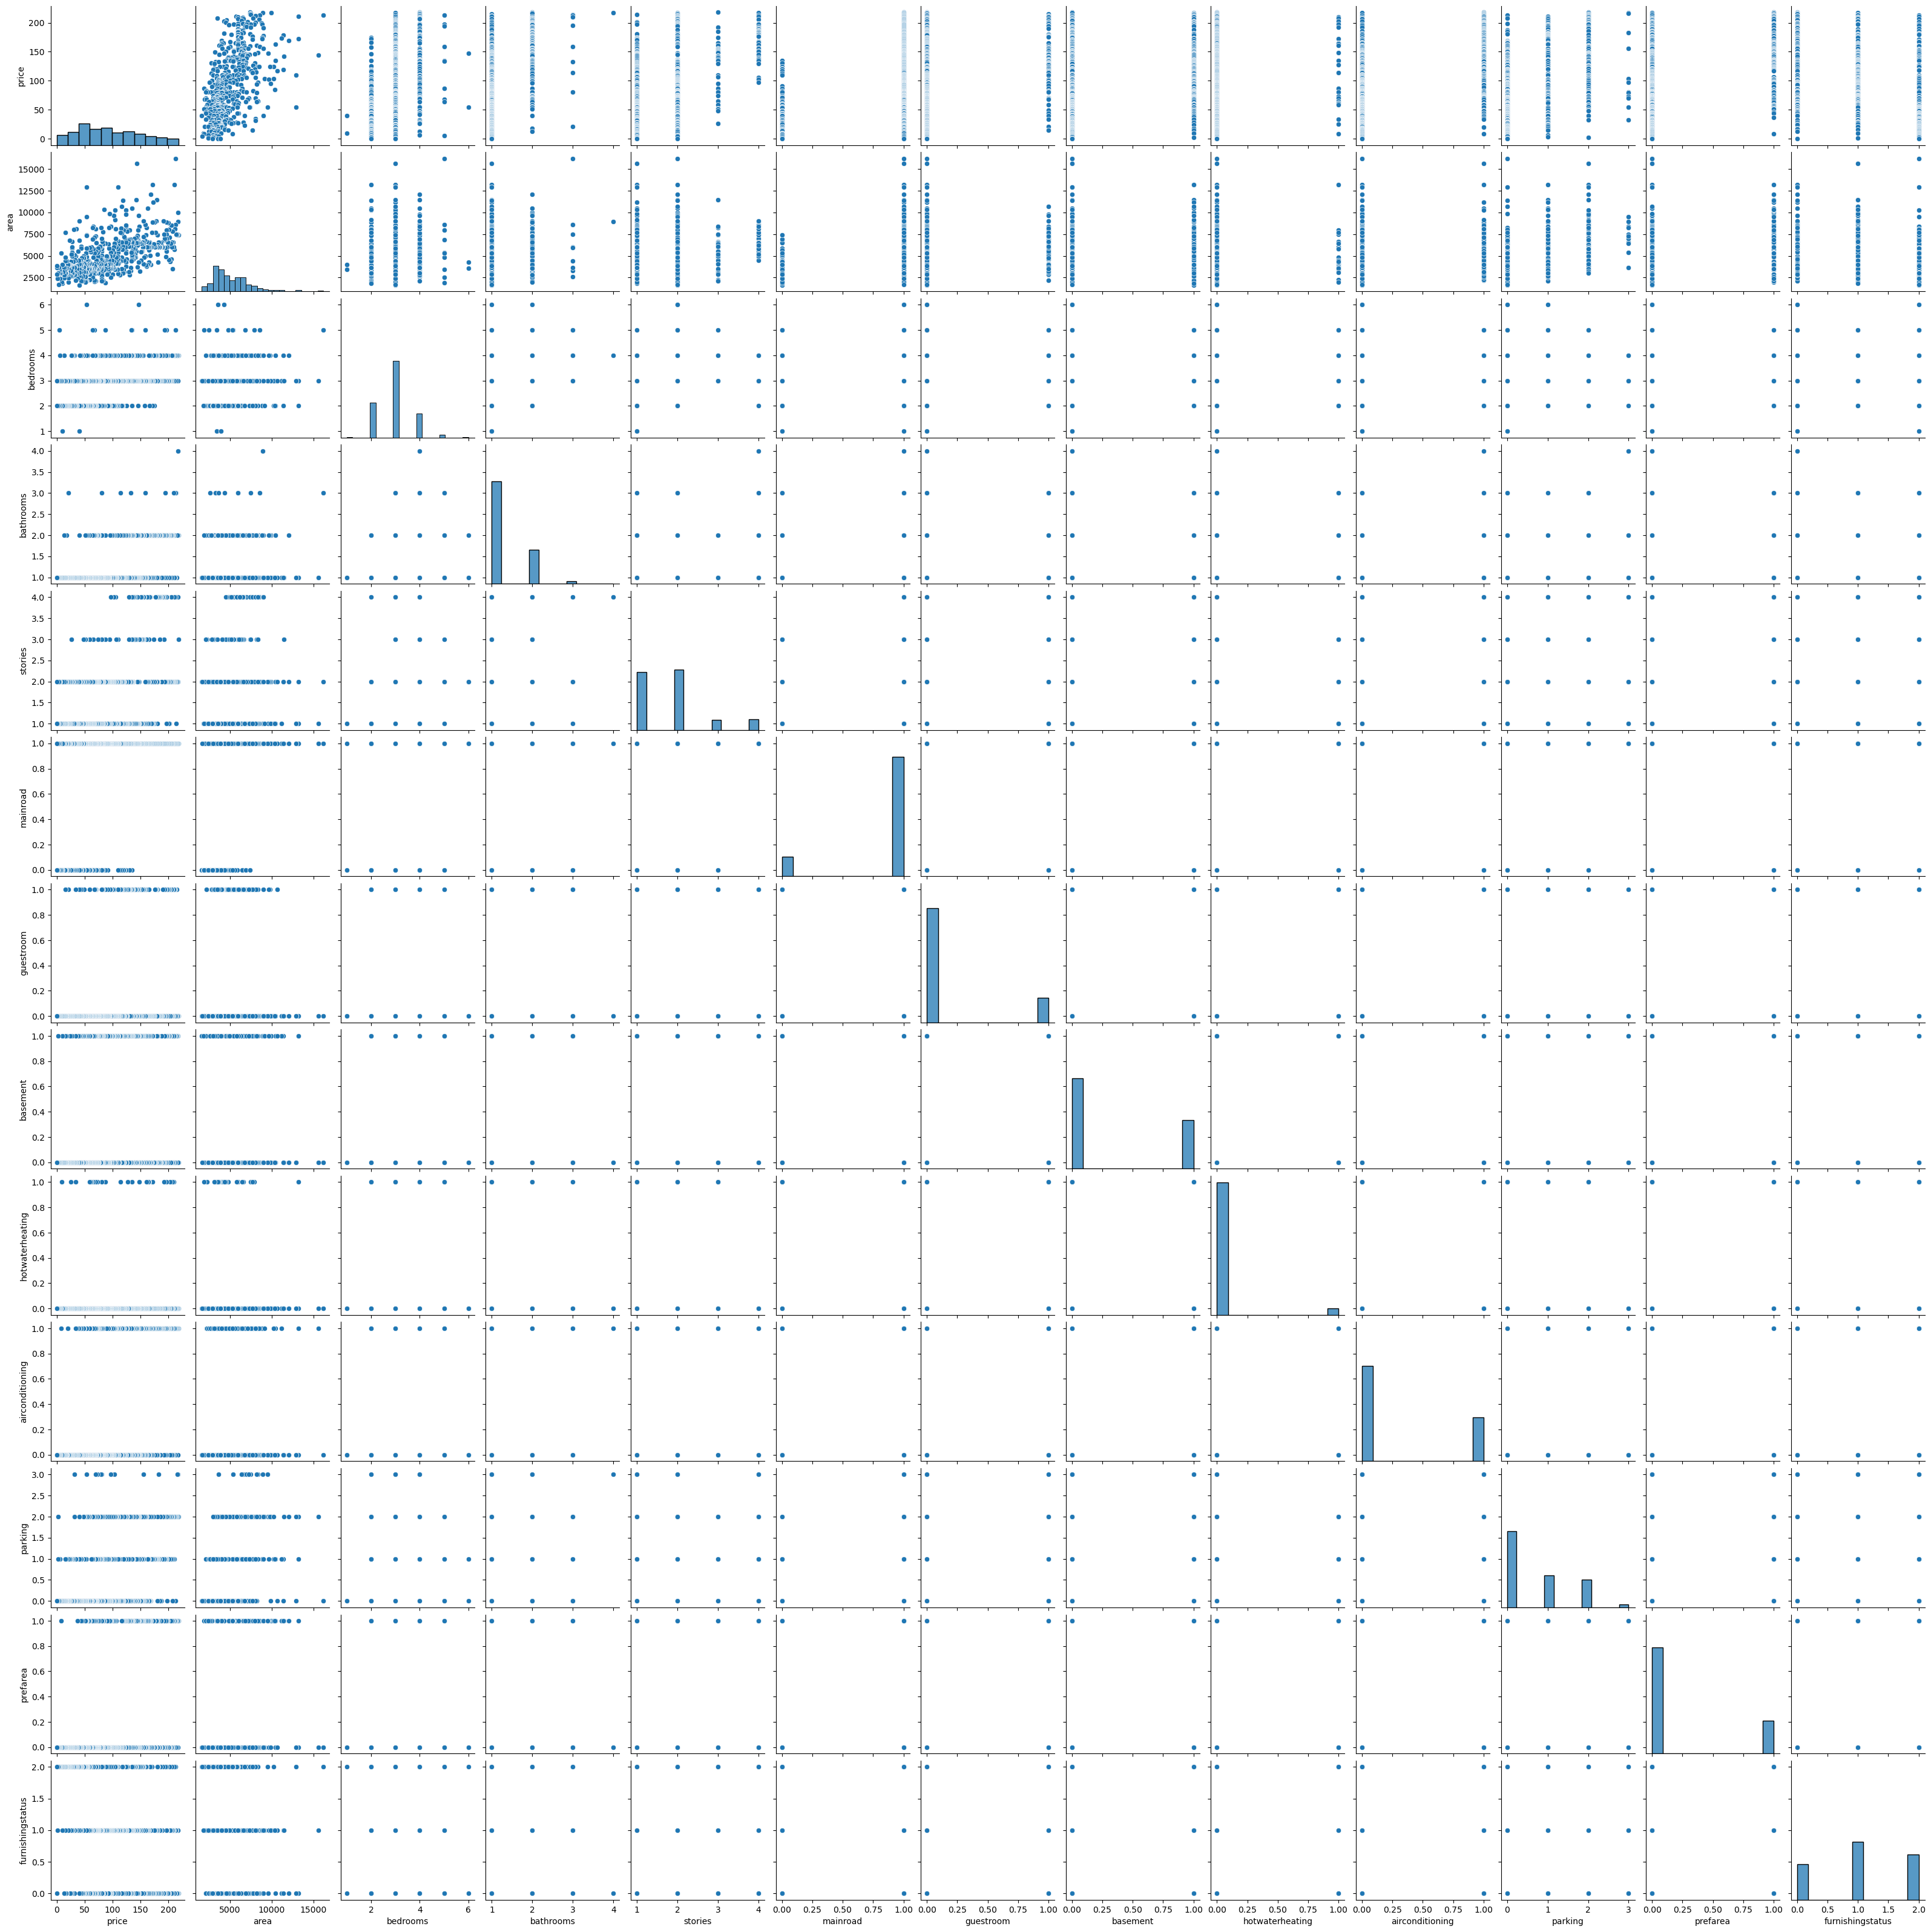

In [237]:
sns.pairplot(df)
plt.show()

In [251]:

# Define features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (436, 12)
X_test shape: (109, 12)
y_train shape: (436,)
y_test shape: (109,)


In [255]:
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
# Create and train the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [257]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [261]:
model.score(X_train, y_train)

0.9965796386579667

In [263]:
model.score(X_test, y_test)

0.6126429095270666

In [259]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1575.4964736044296
